In [15]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [16]:
N = 10
tlist = np.linspace(0, 1.0, 101)

K = np.complex(250,10)
k = np.complex(15,2)
E_p = 4*K

a = destroy(10)
a_dag = a.dag()

r_not = (((4*E_p*E_p) - ((k*k)/4))/(4*K*K))**(1/4)
theta_not = 0.5*np.arctan((k/(((16*E_p*E_p) - k*k)**(0.5))))
a_not = r_not * np.exp(np.complex(0,theta_not))

H_not = (-1)*K*a_dag*a_dag*a*a + (E_p*a_dag*a_dag + E_p.conjugate()*a*a)
H_eff = H_not - np.complex(0,1)*(k*a_dag*a*0.5)
D = displace(N,a_not)
H_eff_prime = D.dag()*H_eff*D

s = coherent(N,a_not)
evolution = mesolve(H_eff_prime, s, tlist, [], [])

In [1]:
'''def plot_wigner(r):
    figure, axis = plt.subplots(1, 1, figsize=(8,8))
    x = np.linspace(-7.5,7.5,200)
    W = wigner(r, x, x)
    #print(W)
    limit = abs(W).max()
    axis.contourf(x, x, W, 1000, norm=mpl.colors.Normalize(-limit,limit), cmap=mpl.cm.get_cmap('RdBu'))
    #print(abs(W).max())
    return figure, axis'''



def plot_wigner(rho, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8,8))
    if isket(rho):
        rho = ket2dm(rho)
    xvec = np.linspace(-7.5,7.5,200)
    W = wigner(rho, xvec, xvec)
    wlim = abs(W).max()
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap('RdBu'))
    ax.set_xlabel(r'$x_1$', fontsize=16)
    ax.set_ylabel(r'$x_2$', fontsize=16)
    return fig, ax

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9ede5883c8>)

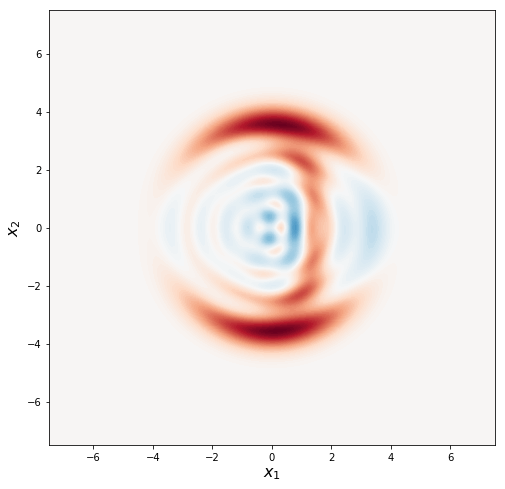

In [18]:
plot_wigner(H_eff_prime)


In [19]:
def plot_fock_distribution_vs_time(tlist, states):
    
    Z = np.zeros((len(tlist), states[0].shape[0]))
    
    for state_idx, state in enumerate(states):
        Z[state_idx,:] = np.real(ket2dm(state).diag())
        
    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    Y, X = np.meshgrid(tlist, range(states[0].shape[0]))
    p = ax.pcolor(X, Y, Z.T, norm=mpl.colors.Normalize(0, 0.5), cmap=mpl.cm.get_cmap('Reds'), edgecolors='k')
    ax.set_xlabel(r'$N$', fontsize=16)
    ax.set_ylabel(r'$t$', fontsize=16)    
    
    cb = fig.colorbar(p)
    cb.set_label('Probability')
    
    return fig, ax

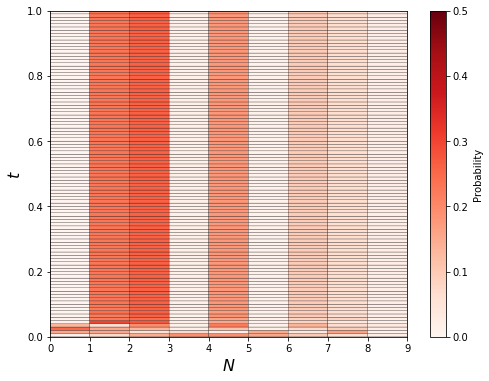

In [20]:
plot_fock_distribution_vs_time(tlist, evolution.states);

In [21]:
from IPython.display import HTML
from matplotlib import animation

In [22]:
from base64 import b64encode

def display_embedded_video(filename):
    video = open(filename, "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
    return HTML(video_tag)

In [2]:
'''fig, ax = plt.subplots(1, 1, figsize=(8,8))

def update(n): 
    plot_wigner(evolution.states[n],fig=fig, ax=ax)
for i in range (0,int(len(evolution.states)/2 + 1)):
    plot_wigner(evolution.states[i])
anim = animation.FuncAnimation(fig, update, frames=int(len(evolution.states)/2 + 1), interval = 50,blit=True)
anim.save('animation-kerr-coherent-state.mp4', fps=10, writer="avconv", codec="libx264")
plt.close(fig)
display_embedded_video("animation-kerr-coherent-state.mp4")'''


'fig, ax = plt.subplots(1, 1, figsize=(8,8))\n\ndef update(n): \n    plot_wigner(evolution.states[n],fig=fig, ax=ax)\nfor i in range (0,int(len(evolution.states)/2 + 1)):\n    plot_wigner(evolution.states[i])\nanim = animation.FuncAnimation(fig, update, frames=int(len(evolution.states)/2 + 1), interval = 50,blit=True)\nanim.save(\'animation-kerr-coherent-state.mp4\', fps=10, writer="avconv", codec="libx264")\nplt.close(fig)\ndisplay_embedded_video("animation-kerr-coherent-state.mp4")'